<a href="https://colab.research.google.com/github/purnaswathimaddukuri/DrugsstoresalesForecast/blob/main/DRUGS_STORE_SALES_FORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Declarative section


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Reading dataset


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Drugs/train.csv',parse_dates = True, index_col = 'Date')

In [ ]:
store = pd.read_csv('/content/drive/My Drive/Drugs/stores.csv')

In [ ]:
state = pd.read_csv('/content/drive/My Drive/Drugs/states.csv')

## Extraction of Data

In [ ]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day

train['SalePerCustomer'] = train['Sales']/train['Customers']


# Displaying dataset

In [ ]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-06-30,1,2,5735,568,1,1,0,0,2015,6,30,10.096831
2015-06-30,2,2,9863,877,1,1,0,0,2015,6,30,11.246294
2015-06-30,3,2,13261,1072,1,1,0,1,2015,6,30,12.370336
2015-06-30,4,2,13106,1488,1,1,0,0,2015,6,30,8.807796
2015-06-30,5,2,6635,645,1,1,0,0,2015,6,30,10.286822


In [ ]:
train.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1114,2,0,0,0,0,a,1,2013,1,1,NaN
2013-01-01,1115,2,0,0,0,0,a,1,2013,1,1,NaN


In [ ]:
state.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Data Description

In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,SalePerCustomer
count,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,1.015764e+06,841887.000000
mean,5.579996e+02,3.995611e+00,5.729205e+03,6.294899e+02,8.288599e-01,3.710212e-01,1.718490e-01,2.013798e+03,6.163555e+00,1.545995e+01,9.472836
std,3.218727e+02,2.002190e+00,3.849622e+03,4.631712e+02,3.766316e-01,4.830784e-01,3.772493e-01,7.473600e-01,3.431092e+00,9.026013e+00,2.207792
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000
25%,2.790000e+02,2.000000e+00,3.682000e+03,4.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,7.000000e+00,7.867311
50%,5.580000e+02,4.000000e+00,5.687000e+03,6.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,9.228843
75%,8.370000e+02,6.000000e+00,7.793000e+03,8.340000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,9.000000e+00,2.300000e+01,10.884373
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,64.957854


In [ ]:
state.describe()

,Store
count,1115.00000
mean,558.00000
std,322.01708
min,1.00000
25%,279.50000
50%,558.00000
75%,836.50000
max,1115.00000


# Checking null values


In [ ]:
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
SalePerCustomer    173877
dtype: int64

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store['StoreType'].value_counts() 

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [ ]:
state.isnull().sum()

Store    0
State    0
dtype: int64

# Filling Missing values

In [ ]:
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-06-28,1,7,0,0,0,0,0,0,2015,6,28,NaN
2015-06-28,2,7,0,0,0,0,0,0,2015,6,28,NaN
2015-06-28,3,7,0,0,0,0,0,0,2015,6,28,NaN
2015-06-28,4,7,0,0,0,0,0,0,2015,6,28,NaN
2015-06-28,5,7,0,0,0,0,0,0,2015,6,28,NaN


In [ ]:
train[(train.Open != 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer
Date,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,NaN
2015-05-02,699,4,0,0,1,1,0,0,2015,5,2,NaN
2014-02-09,663,1,0,0,1,0,0,1,2014,2,9,NaN
2014-08-28,391,3,0,0,1,1,0,1,2014,8,28,NaN


In [ ]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

In [ ]:
train.isnull().sum()

Store              0
DayOfWeek          0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
SalePerCustomer    0
dtype: int64

In [ ]:
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [ ]:
store.loc[290]

Store                         291
StoreType                       d
Assortment                      a
CompetitionDistance          2325
CompetitionOpenSinceMonth     NaN
CompetitionOpenSinceYear      NaN
Promo2                          0
Promo2SinceWeek               NaN
Promo2SinceYear               NaN
PromoInterval                 NaN
Name: 290, dtype: object

In [ ]:
store.loc[621]

Store                         622
StoreType                       a
Assortment                      c
CompetitionDistance          2325
CompetitionOpenSinceMonth     NaN
CompetitionOpenSinceYear      NaN
Promo2                          0
Promo2SinceWeek               NaN
Promo2SinceYear               NaN
PromoInterval                 NaN
Name: 621, dtype: object

In [ ]:
store.loc[878]

Store                                    879
StoreType                                  d
Assortment                                 a
CompetitionDistance                     2325
CompetitionOpenSinceMonth                NaN
CompetitionOpenSinceYear                 NaN
Promo2                                     1
Promo2SinceWeek                            5
Promo2SinceYear                         2013
PromoInterval                Feb,May,Aug,Nov
Name: 878, dtype: object

In [ ]:
store.fillna(0, inplace = True)

In [ ]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Merging two datasets store and train

In [ ]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [ ]:
train_store_state = pd.merge(train_store, state, how='inner', on ='Store');

In [ ]:
train_store_state.shape

(841885, 22)

In [ ]:
train_store_state.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,2,5735,568,1,1,0,0,2015,6,30,10.096831,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,HE
1,1,1,5197,541,1,1,0,0,2015,6,29,9.606285,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,HE
2,1,6,4019,463,1,0,0,0,2015,6,27,8.680346,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,HE
3,1,5,3317,420,1,0,0,0,2015,6,26,7.897619,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,HE
4,1,4,3533,433,1,0,0,0,2015,6,25,8.159353,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,HE


In [ ]:
train_store_state.groupby('StoreType')['Sales'].describe()  

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,453691.0,6894.676745,3283.571628,124.0,4663.0,6244.0,8365.0,41551.0
b,15213.0,10036.338461,5194.658093,1452.0,6114.0,8918.0,13003.0,38722.0
c,111185.0,6884.840158,2939.333475,133.0,4840.0,6338.0,8287.0,31448.0
d,261796.0,6773.570047,2585.918380,538.0,4989.0,6328.0,8062.0,38037.0


In [ ]:
train_store_state.groupby('StoreType')['Customers'].sum()


StoreType
a    360619053
b     30319207
c     90463095
d    158011833
Name: Customers, dtype: int64

## Model

# ARIMA - AutoRegressive Integrated Moving Averages



## Checking stationarity

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time i.e no seasonality.

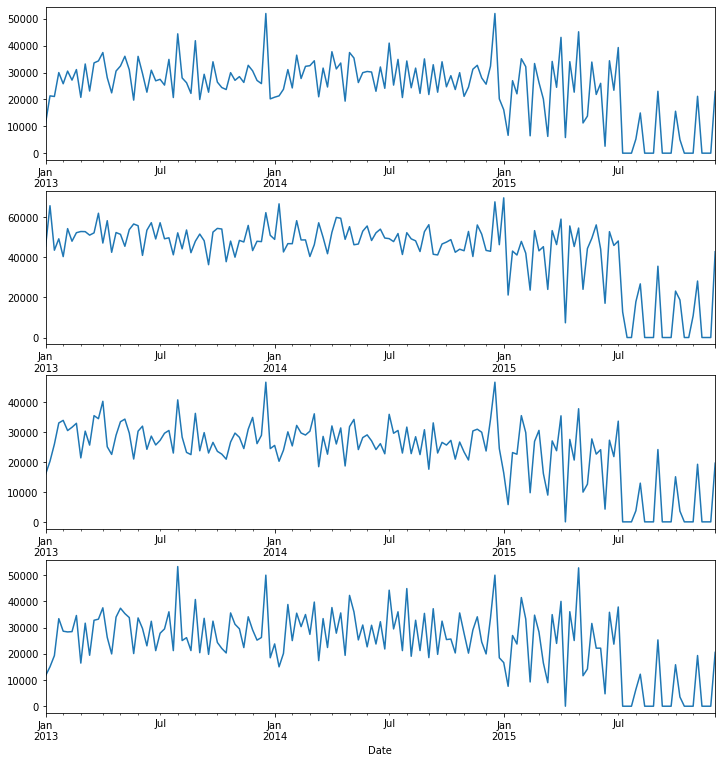

In [ ]:
train['Sales'] = train['Sales'] * 1.0

sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True)
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)

**Augmented Dickey-Fuller test**

*H0* : Time series is non-stationary.

H1 : Time series is stationary.

So, if the p-value of the test is less than the significance level (< 0.05) then reject the null hypothesis and infer that the time series is indeed stationary.

In [ ]:
print('Results of Dickey-Fuller Test:')
result = adfuller(sales_a, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -5.770938
p-value: 0.000001
Critical Values:
1% -3.4392057325732104
5% -2.8654483492874236
10% -2.5688512291811225


In [ ]:
print('Results of Dickey-Fuller Test:')
result = adfuller(sales_b, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -7.699738
p-value: 0.000000
Critical Values:
1% -3.4376611618861697
5% -2.864767502722044
10% -2.5684885413039127


In [ ]:
print('Results of Dickey-Fuller Test:')
result = adfuller(sales_c, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -5.991138
p-value: 0.000000
Critical Values:
1% -3.4392177416762086
5% -2.8654536415414684
10% -2.5688540485756026


In [ ]:
print('Results of Dickey-Fuller Test:')
result = adfuller(sales_d, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(key, value)

Results of Dickey-Fuller Test:
ADF Statistic: -6.560583
p-value: 0.000000
Critical Values:
1% -3.439302726125018
5% -2.8654910924750547
10% -2.5688740002680124


In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Drugs/train.csv',parse_dates=['Date'],dayfirst=True, index_col = 'Date')

In [ ]:
Store_data = train[train.Store == 963]
data=Store_data.iloc[::-1]
store_data2 = data['Sales']

In [ ]:
store_data2.shape

(911,)

In [ ]:
store_data2

Date
2013-01-01        0
2013-01-02     9532
2013-01-03    10043
2013-01-04     9524
2013-01-05     3715
              ...  
2015-06-26     8611
2015-06-27     3707
2015-06-28        0
2015-06-29    18850
2015-06-30    18973
Name: Sales, Length: 911, dtype: int64

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
            model = sm.tsa.statespace.SARIMAX(store_data2,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:19448.118560913023
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:18981.018811226946
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:18928.54725289104
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:18015.043680370673
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:18765.05668953063
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:18349.023600796514
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:18412.832437583587
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:18064.809220822404
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:18959.56845786445
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:18657.017134794973
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:18802.554112000267
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:18114.078117012294
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:18529.667346307426
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:18469.559778962204
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:18341.828540397073
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:18102.86720916666
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:18734.951802009367
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:18374.505319036

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
model_sarima = sm.tsa.statespace.SARIMAX(store_data2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
results_sarima = model_sarima.fit()
pred_uc = results_sarima.get_forecast(steps=2500)


In [ ]:
output = pred_uc.predicted_mean
result = output.to_frame(name="sales").reset_index()
result.rename(columns = {'index':'Date'},inplace = True)
result['sales'] = result['sales'].astype(int)



In [ ]:
result

,Date,sales
0,2015-07-01,8914
1,2015-07-02,9272
2,2015-07-03,9888
3,2015-07-04,10129
4,2015-07-05,9439
...,...,...
2395,2022-01-20,11908
2396,2022-01-21,11278
2397,2022-01-22,11399
2398,2022-01-23,11263


PREDICT SALES ON PARTICULAR DATE

In [ ]:
sale_count = result[result.Date == "2015-11-11"]

In [ ]:
sale_count

,Date,sales
133,2015-11-11,9407


In [ ]:
res = sale_count.iloc[0]['sales']

In [ ]:
res

9407

PREDICT SALES ON PARTICULAR DURATION

In [ ]:
sale_counts = result[(result['Date'] >= "2015-08-01") & (result['Date'] <= "2015-08-09")]
sale_counts


,Date,sales
31,2015-08-01,9486
32,2015-08-02,8856
33,2015-08-03,8977
34,2015-08-04,8842
35,2015-08-05,9051
36,2015-08-06,8950
37,2015-08-07,9308
38,2015-08-08,9925
39,2015-08-09,10166


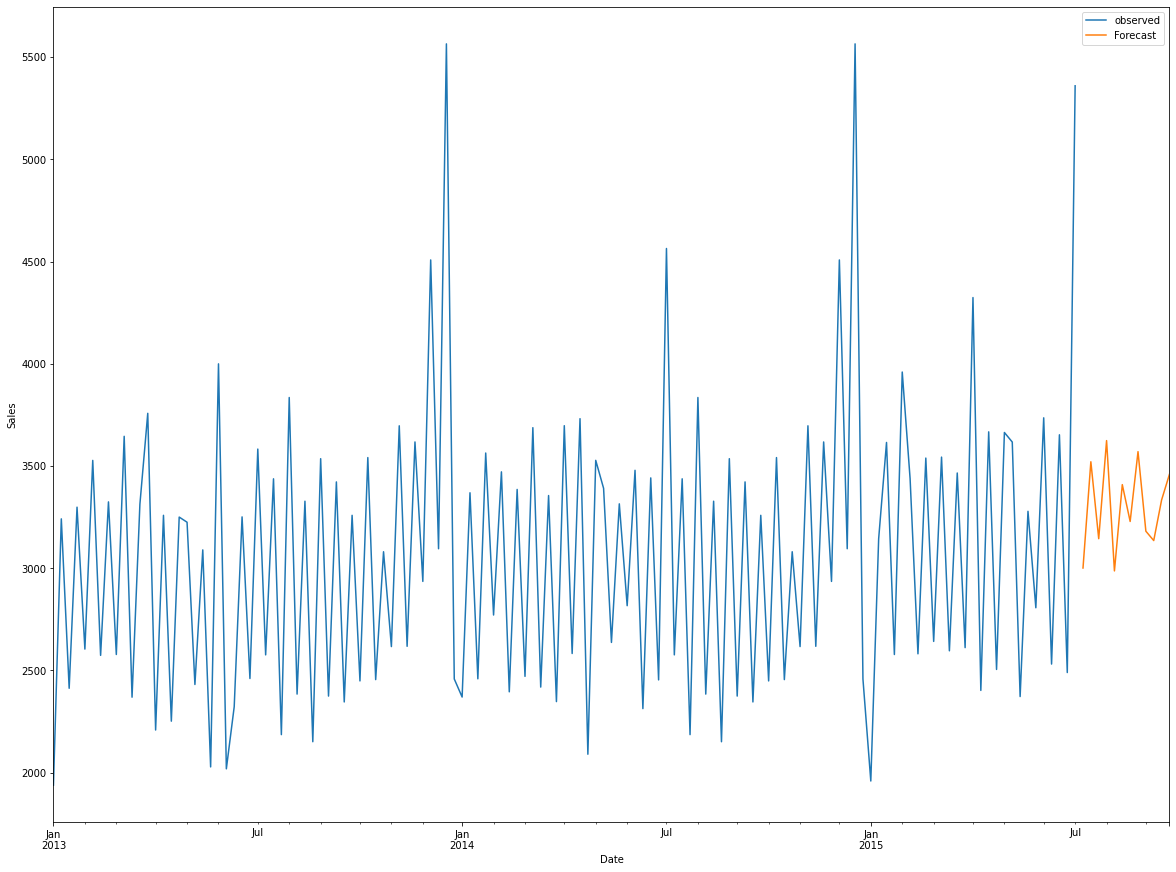

In [ ]:
Store_data = train[train.Store == 78]
sales_data1 = Store_data['Sales'].resample('W').mean()
model_sarima = sm.tsa.statespace.SARIMAX(sales_data1,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
results_sarima = model_sarima.fit()
pred_uc = results_sarima.get_forecast(steps=12)
plt.subplots()           
ax = sales_data1.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

**FRONT_END**

In [ ]:
from flask import Flask, request, render_template
!pip install flask-ngrok
from flask import Flask, render_template, request,send_file
from flask_ngrok import run_with_ngrok
from flask import Flask
from io import BytesIO
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt


In [ ]:
%mkdir templates -p

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
import pickle 
app = Flask(__name__)
run_with_ngrok(app)
@app.route("/")

def home():
  return render_template('Details.html')
@app.route('/Iddetails')  
def details():  
    return render_template("Iddetails.html");  
@app.route('/Duration')  
def duration():  
    return render_template("Duration.html");

In [ ]:
@app.route("/graphic")
def graph():
  return render_template('Graphic.html')  
@app.route('/predictsales',methods=['POST'])
def printsales():
  if request.method=='POST':
        store_id=request.form['ids']
        id2 = int(store_id)
        Date1=request.form['indate']
        if id2<=1115 and id2>=1:
           Store_data = train[train.Store == id2]
           data=Store_data.iloc[::-1]
           store_data2 = data['Sales']
           model_sarima = sm.tsa.statespace.SARIMAX(store_data2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
           results_sarima = model_sarima.fit()
           pred_uc = results_sarima.get_forecast(steps=2500)
           output = pred_uc.predicted_mean
           result = output.to_frame(name="sales").reset_index()
           result.rename(columns = {'index':'Date'},inplace = True)
           result['sales'] = result['sales'].astype(int)
           sale_count = result[result.Date == Date1] 
           res = sale_count.iloc[0]['sales']
           return render_template('IddetailOutput.html',pre=res) 
        else:
           return render_template('Invalid.html') 


In [ ]:
@app.route('/predictdurationsales',methods=['POST'])
def printsalesDuration():
  if request.method=='POST':
        store_id=request.form['ids']
        id2 = int(store_id)
        Fromdate=request.form['date1']
        Todate=request.form['date2']   
        if id2<=1115 and id2>=1:
           Store_data = train[train.Store == id2]
           data=Store_data.iloc[::-1]
           store_data2 = data['Sales']
           model_sarima = sm.tsa.statespace.SARIMAX(store_data2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
           results_sarima = model_sarima.fit()
           pred_uc = results_sarima.get_forecast(steps=2500)
           output = pred_uc.predicted_mean
           result = output.to_frame(name="sales").reset_index()
           result.rename(columns = {'index':'Date'},inplace = True)
           result['sales'] = result['sales'].astype(int)
           sale_counts = result[(result['Date'] >= Fromdate) & (result['Date'] <= Todate)]
           res = pd.DataFrame(sale_counts)
           return render_template('DurationOutput.html',pre=res.to_html()) 
        else:
           return render_template('Invalid.html') 


In [ ]:
@app.route('/predictGraph',methods=['POST'])
def printgraph():
  if request.method=='POST':
        store_id=request.form['ids']
        id2 = int(store_id)
        if id2 <= 1115 and id2 >= 1:
           Store_data = train[train.Store == id2]
           sales_data1 = Store_data['Sales'].resample('W').mean()
           model_sarima = sm.tsa.statespace.SARIMAX(sales_data1,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
           results_sarima = model_sarima.fit()
           pred_uc = results_sarima.get_forecast(steps=12)
           fig,ax = plt.subplots()
           ax = sales_data1.plot(label='observed', figsize=(20, 15))
           pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
           ax.set_xlabel('Date')
           ax.set_ylabel('Sales')
           plt.legend()
           plt.show()
           canvas = FigureCanvas(fig)
           img1 = BytesIO()
           fig.savefig(img1)
           img1.seek(0)
           return send_file(img1,mimetype='image/png')
        else:
           return render_template('Invalid.html') 


In [ ]:
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://cf27cb4a5899.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [01/Jul/2021 04:58:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 04:58:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [01/Jul/2021 04:58:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 04:58:08] "GET /Iddetails HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 04:58:10] "GET /Iddetails HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 04:58:26] "GET /predictsales HTTP/1.1" 405 -
127.0.0.1 - - [01/Jul/2021 04:58:30] "POST /predictsales HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:01:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:01:09] "GET /Iddetails HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:01:34] "POST /predictsales HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:01:57] "POST /predictsales HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:18:02] "POST /predictsales HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:18:03] "POST /predictsales HTTP/1.1" 200 -
127.0.0.1 - - [01/Jul/2021 05:18:03] "POST /predictsales HTTP/1.1" 200 -


**PLOTS**

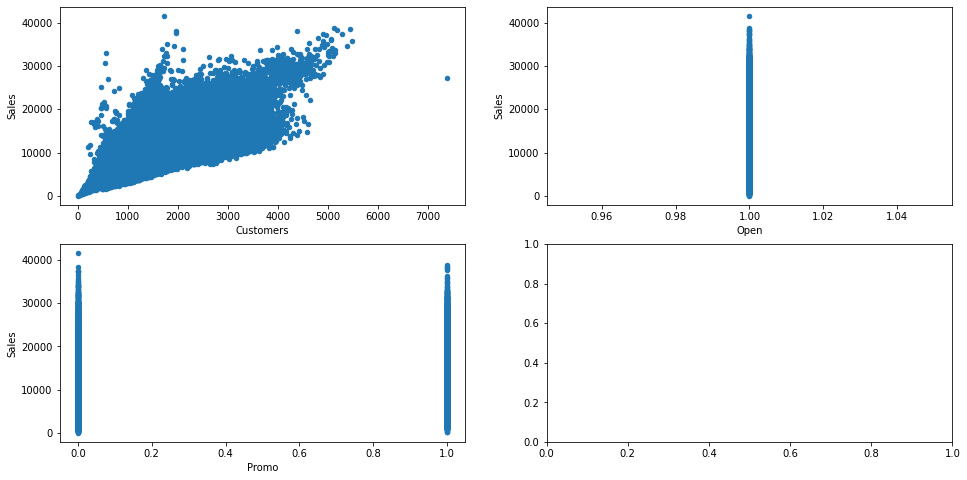

In [ ]:
fig,ax=plt.subplots(2,2)
train_store_state.plot(kind='scatter',x='Customers',y='Sales',ax=ax[0][0],figsize=(16,8))
train_store_state.plot(kind='scatter',x='Open',y='Sales',ax=ax[0][1])
train_store_state.plot(kind='scatter',x='Promo',y='Sales',ax=ax[1][0])
plt.show()

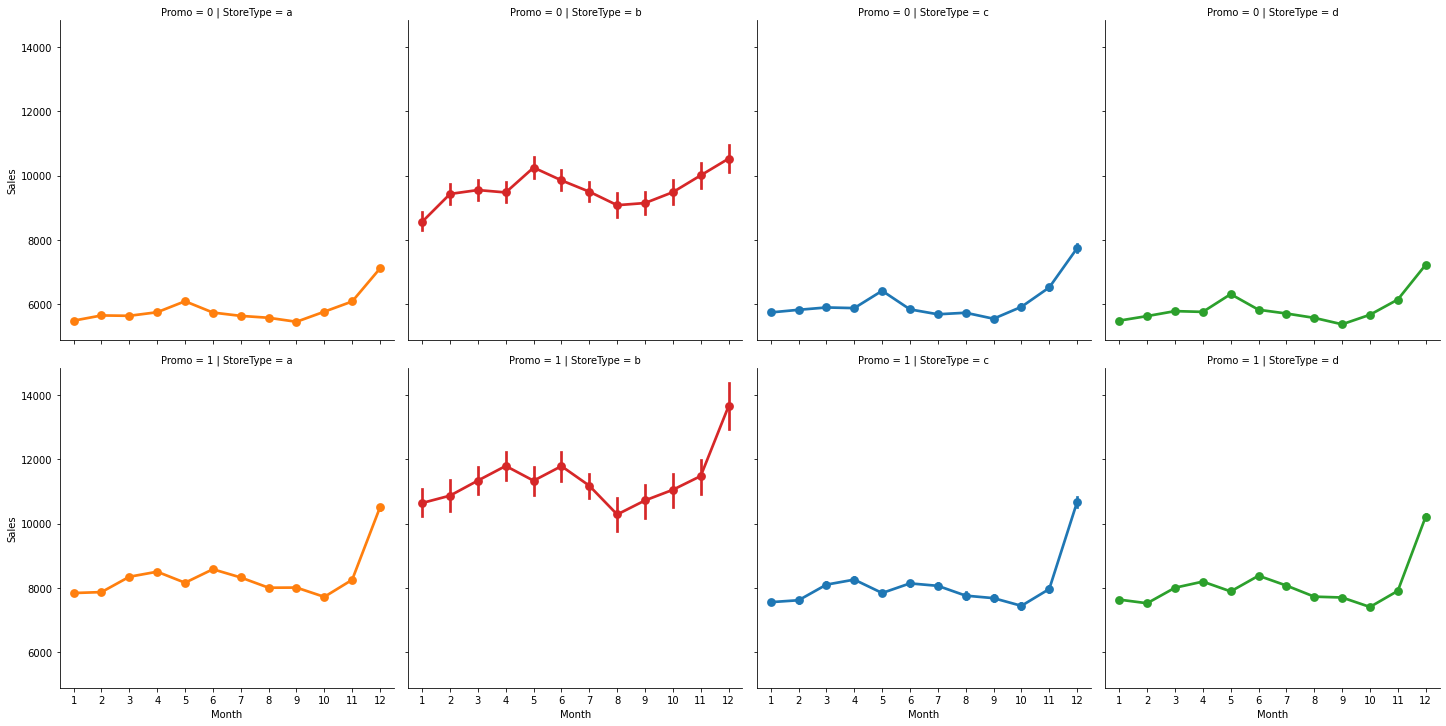

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = "Sales", 
               hue = 'StoreType',col = 'StoreType',
               row = 'Promo', col_order = ['a','b','c','d']) 

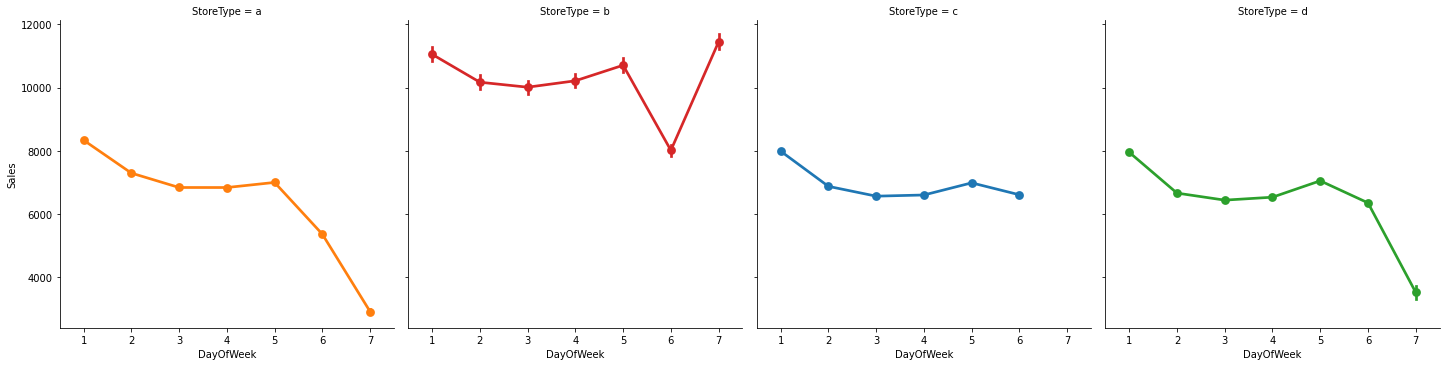

In [ ]:
sns.factorplot(data = train_store_state, x = 'DayOfWeek', y = "Sales", 
               hue = 'StoreType',col = 'StoreType', 
               col_order = ['a','b','c','d']) 


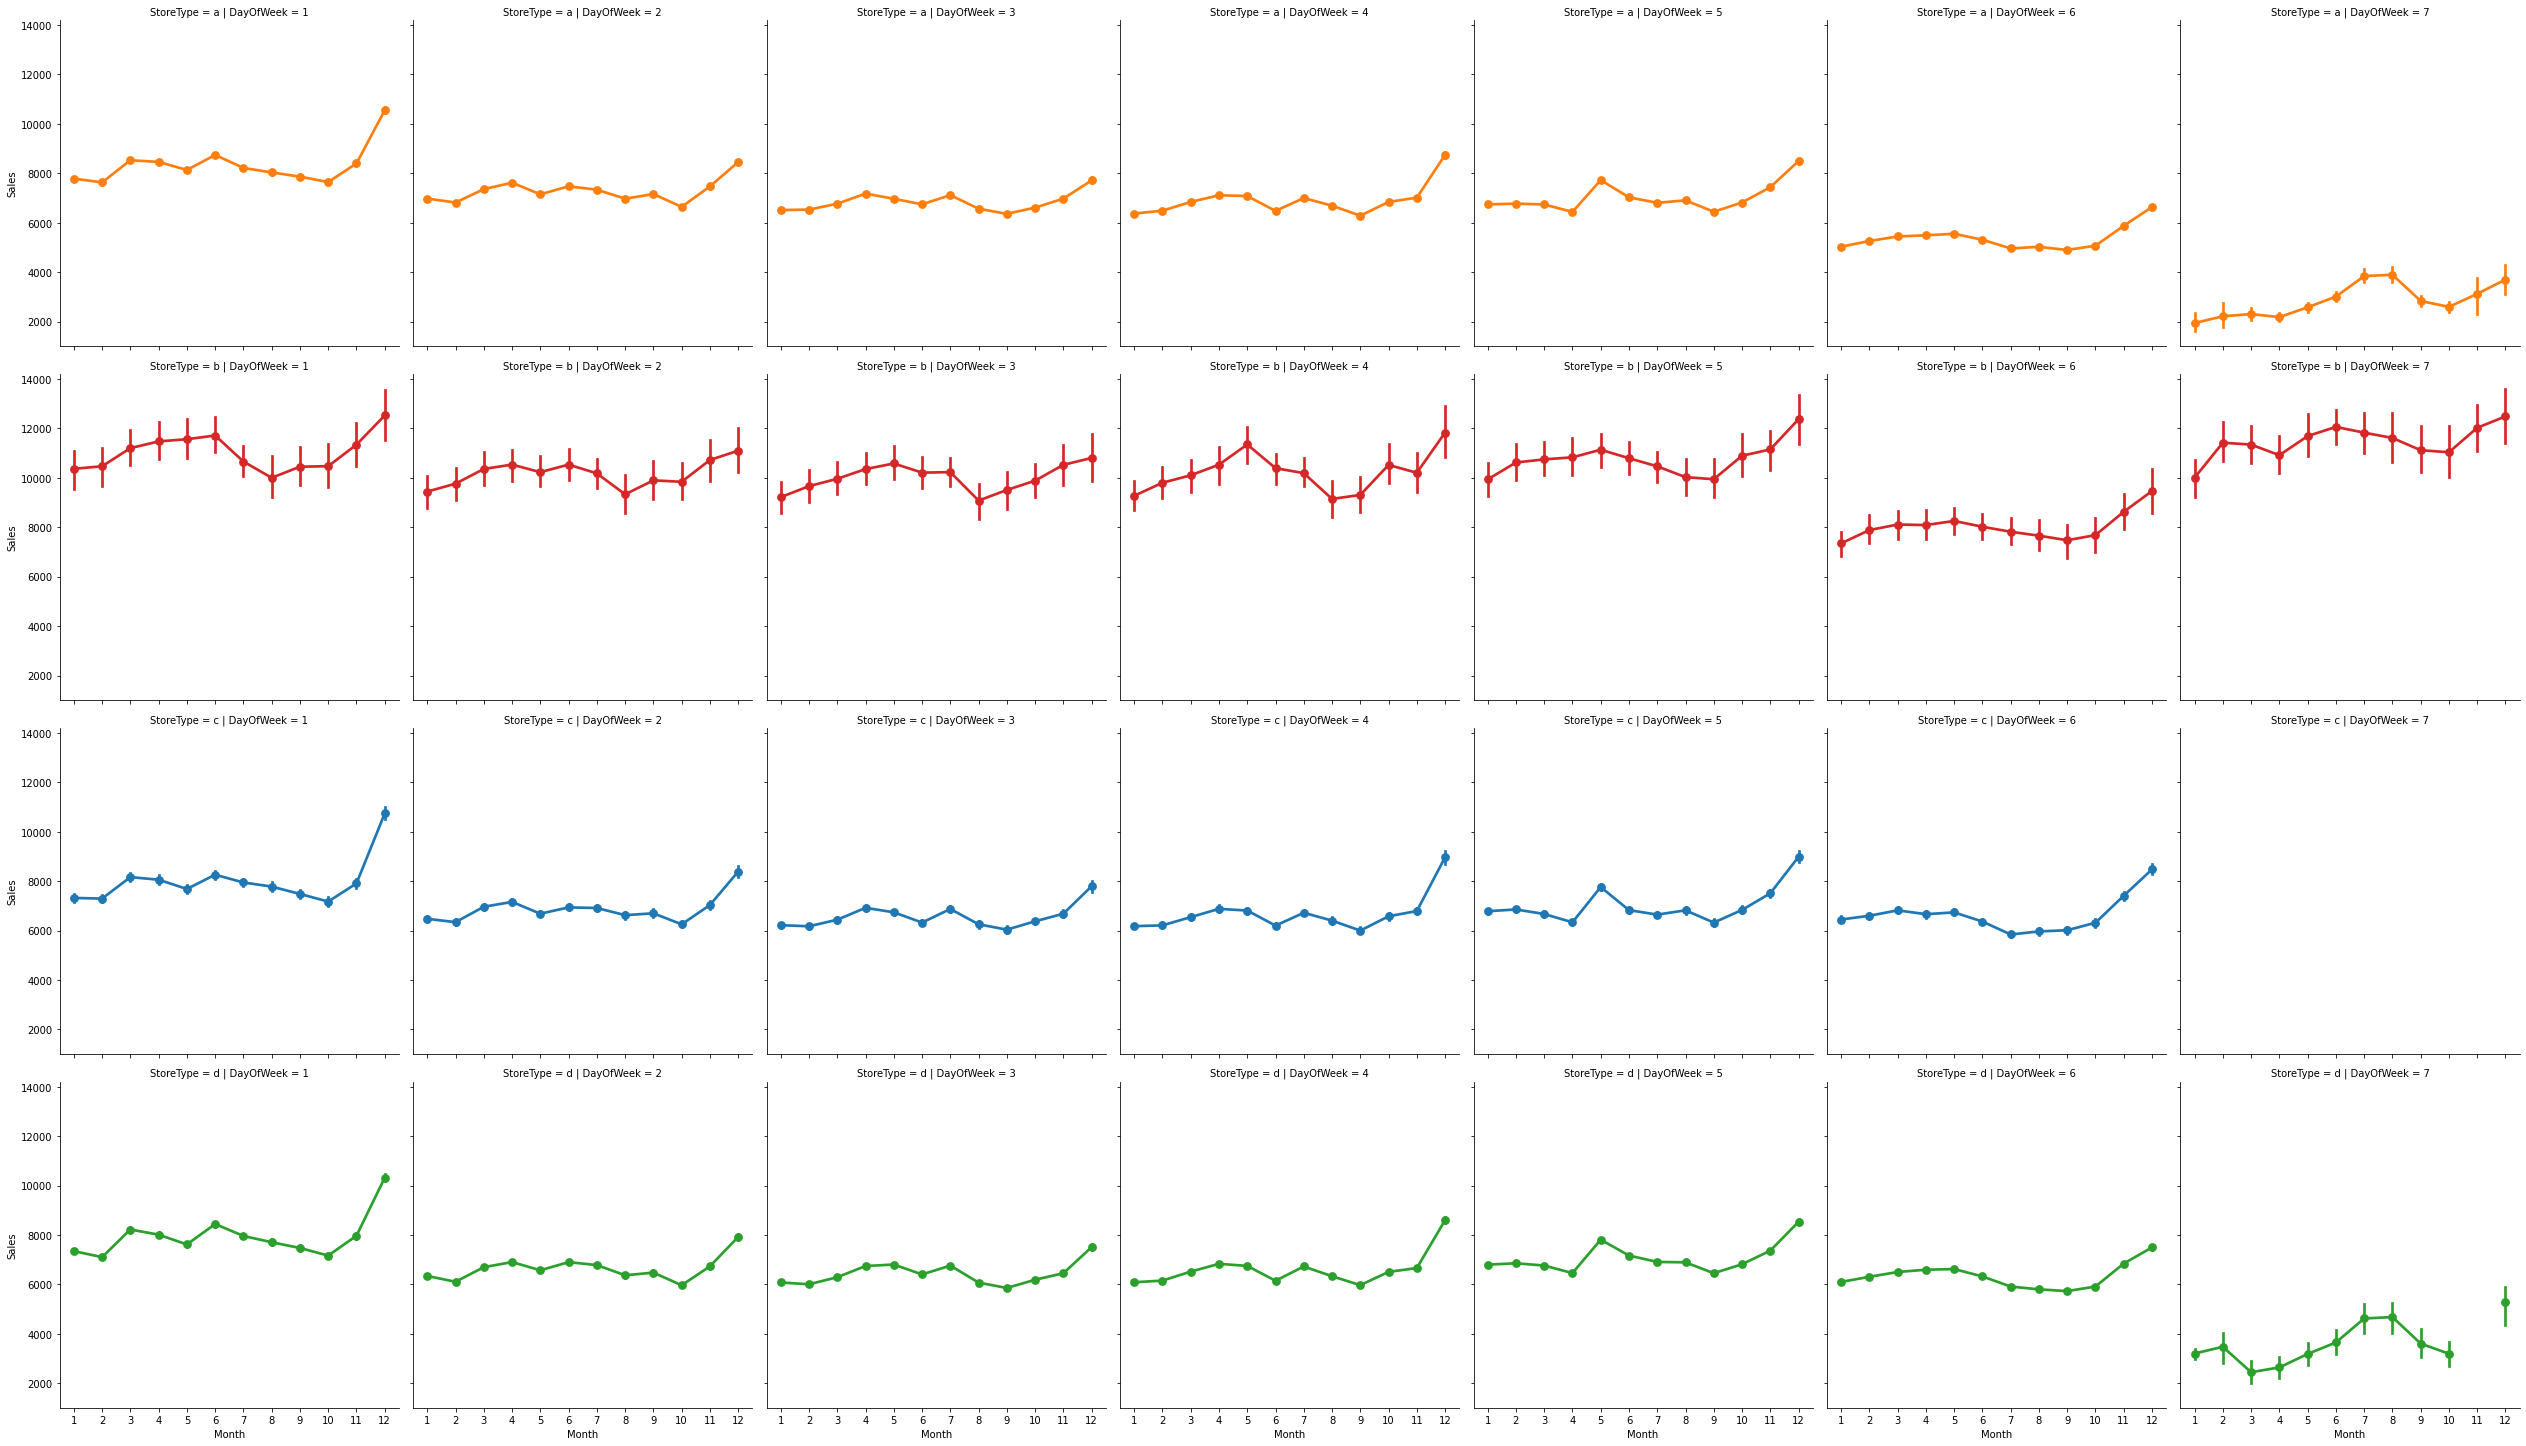

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = "Sales", 
               hue = 'StoreType',col = 'DayOfWeek',
               row = 'StoreType',row_order = ['a','b','c','d']) 


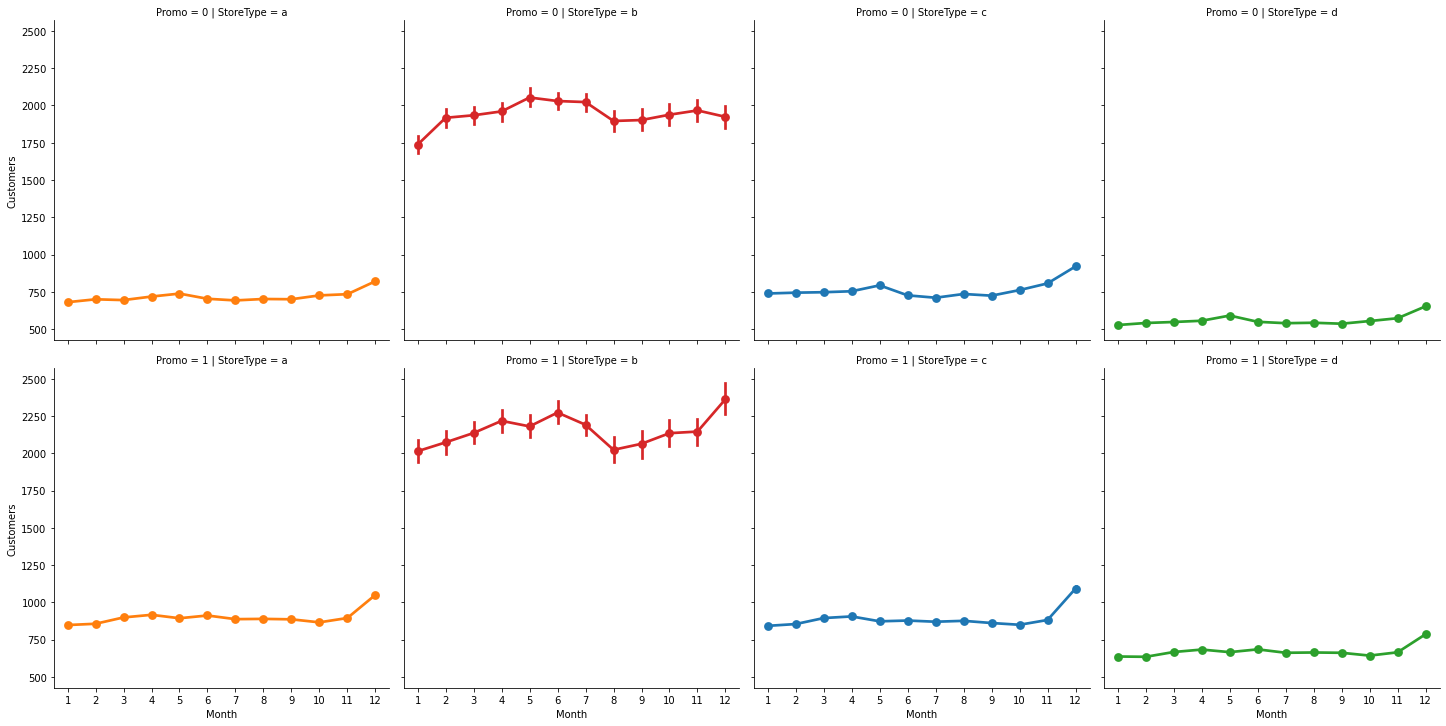

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = "Customers", 
               hue = 'StoreType',col = 'StoreType',
               row = 'Promo', col_order = ['a','b','c','d']) 


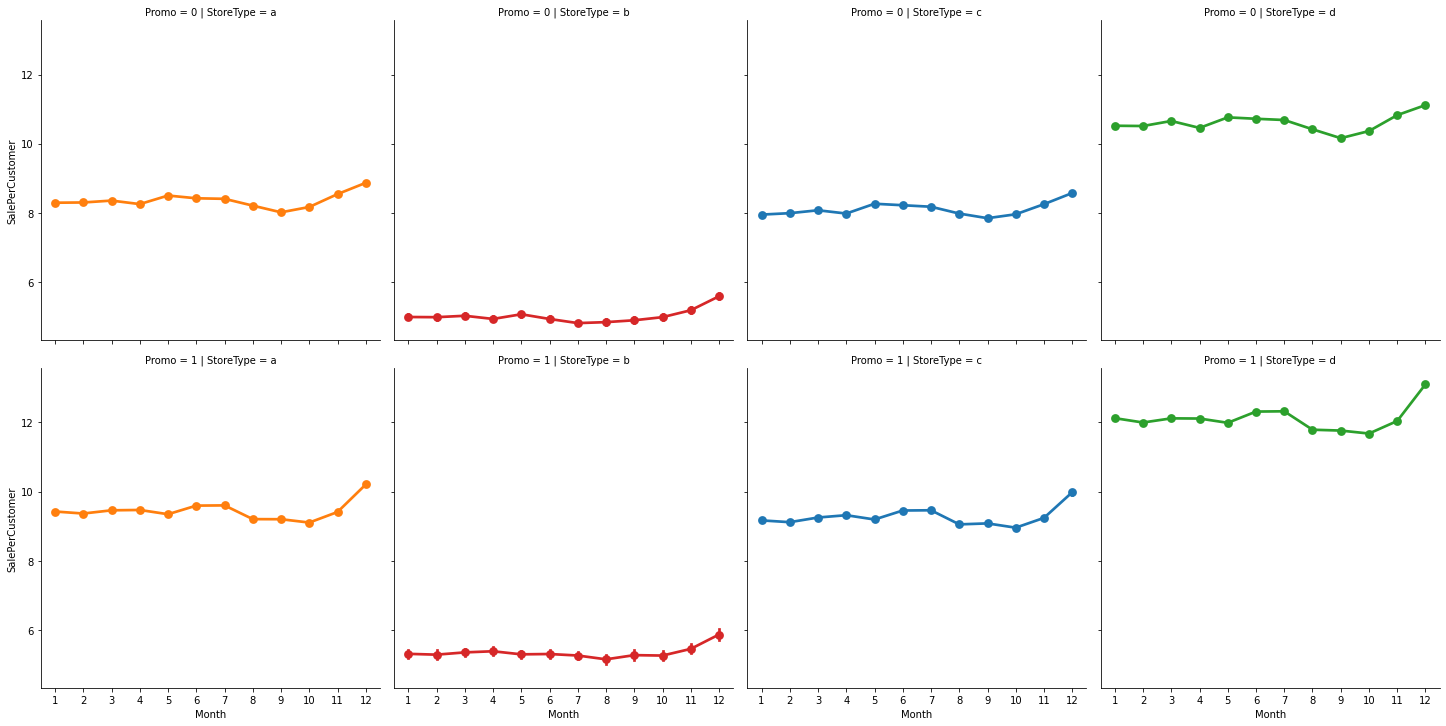

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = 'SalePerCustomer', 
               hue = 'StoreType',col = 'StoreType', 
               row = 'Promo',col_order = ['a','b','c','d']) 


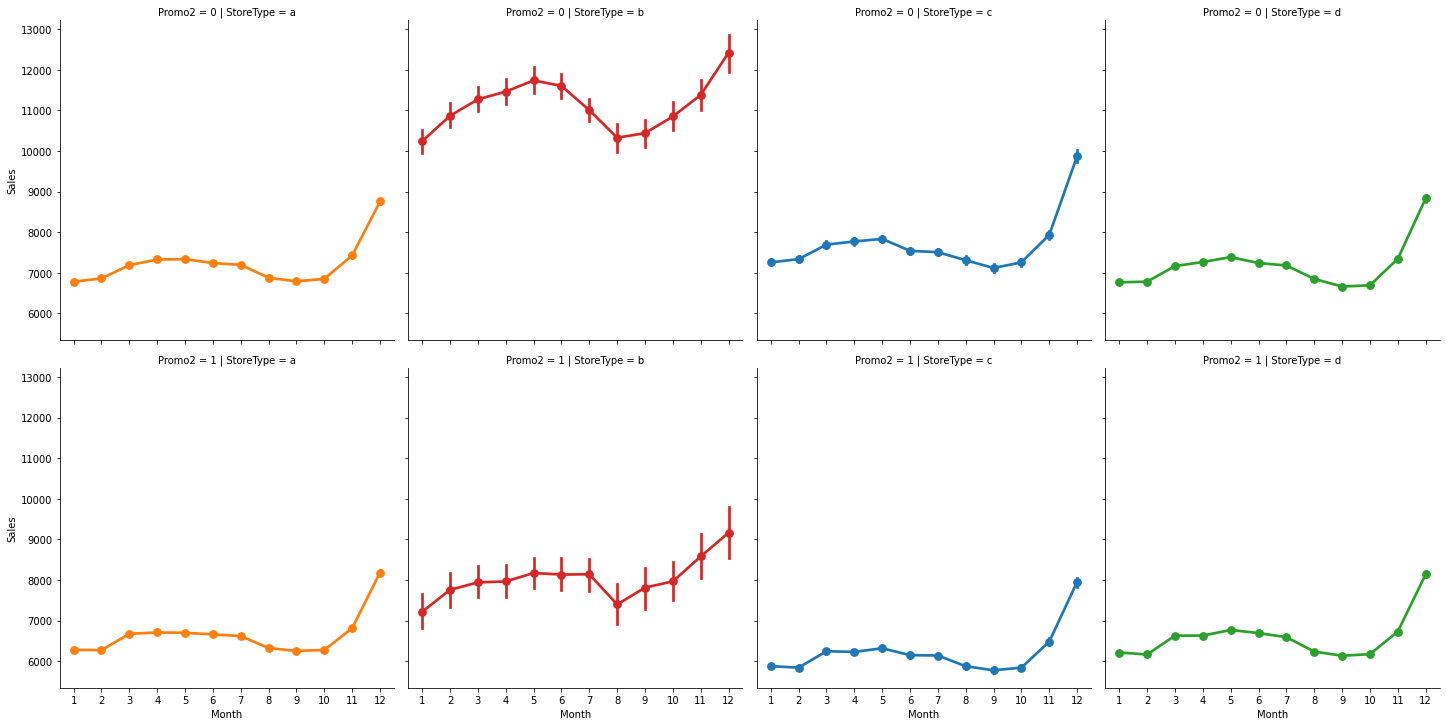

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = 'Sales', 
               hue = 'StoreType',col = 'StoreType', row = 'Promo2', 
               col_order = ['a','b','c','d']) 


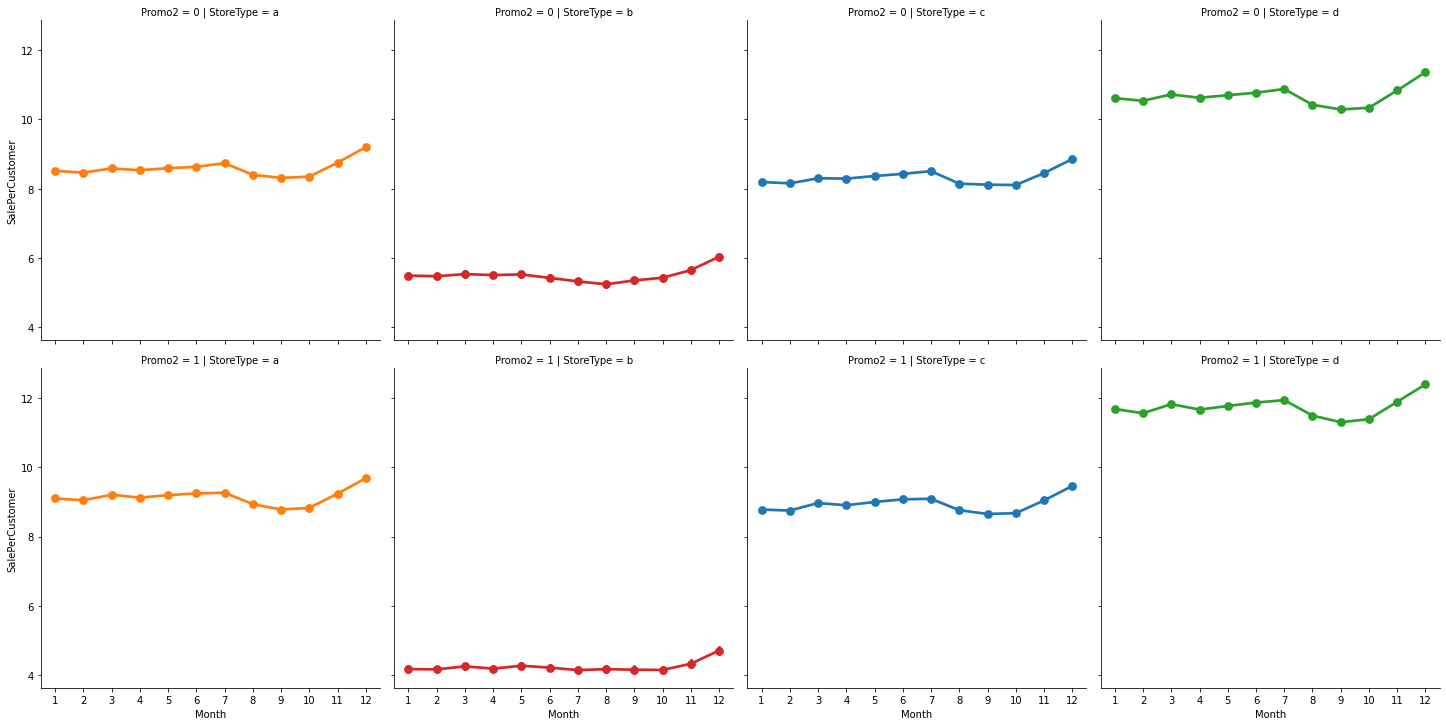

In [ ]:
sns.factorplot(data = train_store_state, x = 'Month', y = 'SalePerCustomer', 
               hue = 'StoreType',col = 'StoreType', 
               row = 'Promo2', col_order = ['a','b','c','d']) 


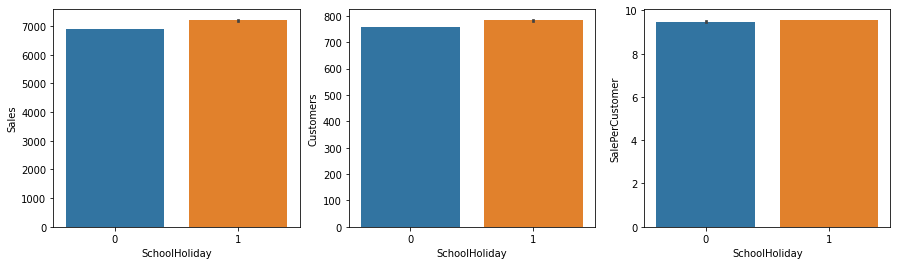

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=train_store_state, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=train_store_state, ax=axis2)
sns.barplot(x='SchoolHoliday',y='SalePerCustomer',data=train_store_state,ax=axis3)


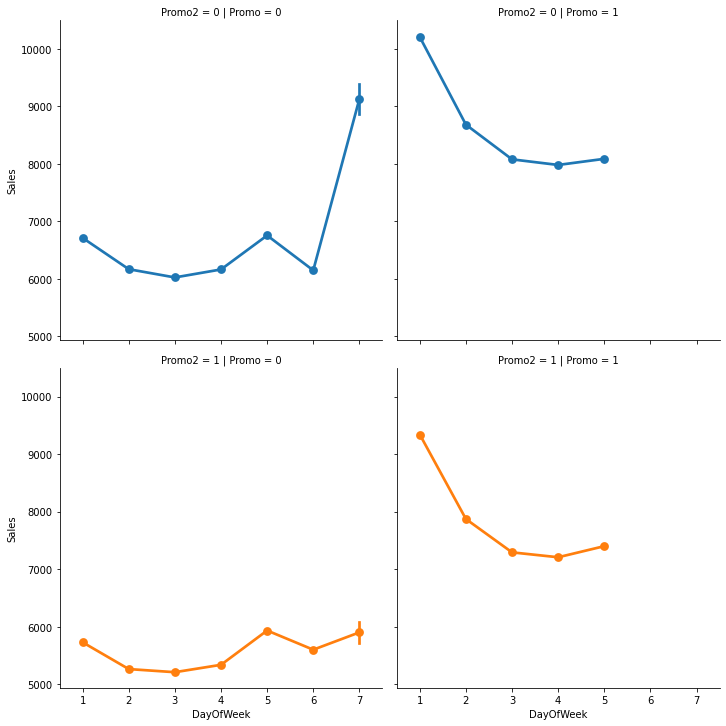

In [ ]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = 'Sales', 
               col = 'Promo', row = 'Promo2',hue = 'Promo2',) 